In [1]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt
import timeit
import h5py
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dense, AveragePooling2D, MaxPooling2D ,Dropout, Flatten
import tensorflow.keras as keras
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"


<h1>Load training, validation, testing set from your preprocessed files</h1>

In [2]:
f = h5py.File("D:\Work\EPE\PracticalIntroductionNN\HW2_template\cat_dog\dc_227.h5", "r")

In [3]:
train_img = f["train_img"][...]
train_lab = f["train_lab"][...]
val_img = f["val_img"][...]
val_lab = f["val_lab"][...]
print(type(train_img))

<class 'numpy.ndarray'>


In [4]:
print('Train: X=%s, y=%s' % (train_img.shape, train_lab.shape))
print('Val: X=%s, y=%s' % (val_img.shape, val_lab.shape))
print(train_lab)

Train: X=(19000, 227, 227, 3), y=(19000,)
Val: X=(1000, 227, 227, 3), y=(1000,)
[0. 1. 1. ... 0. 1. 0.]


In [5]:
img_width, img_height, img_num_channels = 227, 227, 3
input_shape = (img_width, img_height, img_num_channels)

In [6]:
"""
Fit_generator
"""
def data_generator(data, targets, batch_size):
    batches = (len(data) + batch_size - 1)//batch_size
    while(True):
         for i in range(batches):
              X = data[i*batch_size : (i+1)*batch_size]
              Y = targets[i*batch_size : (i+1)*batch_size]
              yield (X, Y)

def eval_generator(data, targets, batch_size):
     batches = (len(data) + batch_size - 1)//batch_size
     for i in range(batches):
          X = data[i*batch_size : (i+1)*batch_size]
          Y = targets[i*batch_size : (i+1)*batch_size]
          yield (X, Y)

In [7]:
batch_size = 200
num_epochs = 20

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"],
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [9]:
history = model.fit(
        data_generator(train_img, train_lab, batch_size=batch_size),
        steps_per_epoch = (len(train_img) + batch_size - 1) // batch_size,
        epochs = num_epochs,
        verbose = 1,
        validation_data = (val_img, val_lab)
)

Epoch 1/20
95/95 [==============================] - 70s 580ms/step - loss: 1.7394 - accuracy: 0.5342 - val_loss: 0.6978 - val_accuracy: 0.5210
Epoch 2/20
95/95 [==============================] - 53s 563ms/step - loss: 0.6756 - accuracy: 0.5769 - val_loss: 0.7718 - val_accuracy: 0.4940
Epoch 3/20
95/95 [==============================] - 38s 400ms/step - loss: 0.6556 - accuracy: 0.6078 - val_loss: 0.8063 - val_accuracy: 0.4820
Epoch 4/20
95/95 [==============================] - 36s 376ms/step - loss: 0.6319 - accuracy: 0.6437 - val_loss: 1.0012 - val_accuracy: 0.5020
Epoch 5/20
95/95 [==============================] - 14s 149ms/step - loss: 0.5981 - accuracy: 0.6794 - val_loss: 1.1257 - val_accuracy: 0.4730
Epoch 6/20
95/95 [==============================] - 13s 132ms/step - loss: 0.5607 - accuracy: 0.7111 - val_loss: 0.9591 - val_accuracy: 0.4750
Epoch 7/20
95/95 [==============================] - 13s 132ms/step - loss: 0.5200 - accuracy: 0.7451 - val_loss: 0.6427 - val_accuracy: 0.6440

In [10]:
train_img = f["train_img"][...]
train_lab = f["train_lab"][...]

In [11]:
train_lab = f["train_lab"][...]

In [12]:
model.evaluate(eval_generator(train_img, train_lab, batch_size=200))

95/95 [==============================] - 13s 126ms/step - loss: 0.2445 - accuracy: 0.8952


[0.24452340602874756, 0.8952105045318604]

<h1>Training and validation</h1>
<h2>Train your model only 10 epochs</h2>
<p style="font-size:20px">1. Print out training accuracy and validation accuracy each training epoch</p>
<p style="font-size:20px">2. Print out training time each training epoch</p>
<p style="font-size:20px">3. Your goal is to reach 85% validation accuracy in 10 training epochs. If you reach that, you can perform testing, print out your test accuracy. Plot out the ten images with title that contains the probability of the labeled class.</p>

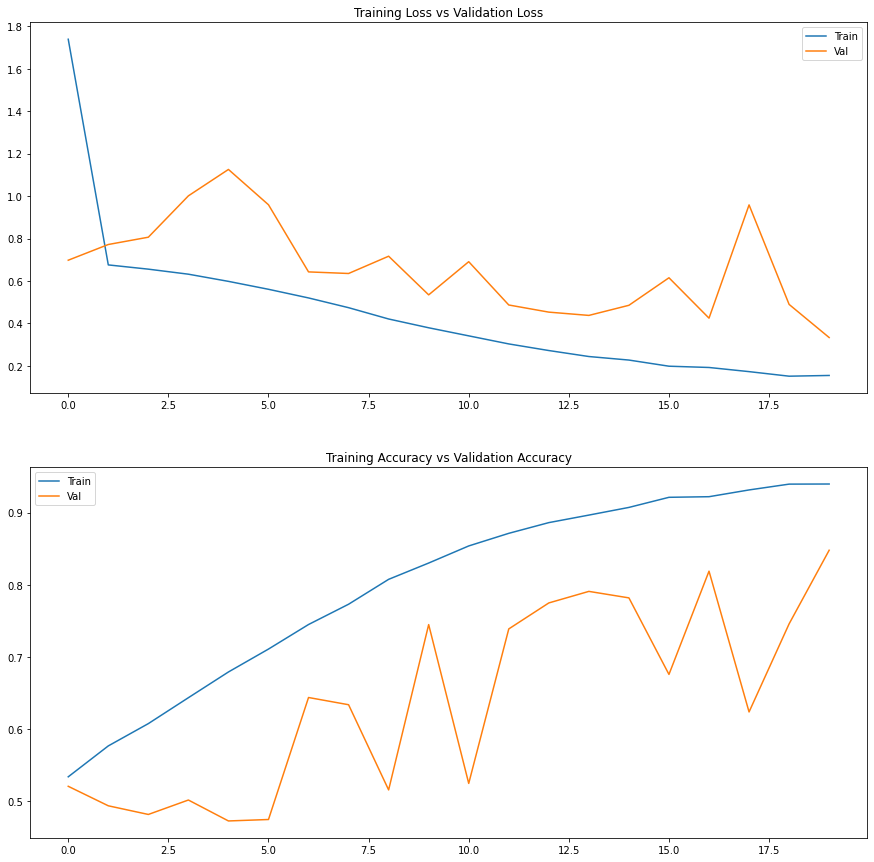

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [14]:
model.save("D:\Work\EPE\PracticalIntroductionNN\HW2_template\cat_dog\\alex.h5")